In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates

import arabic_reshaper


## 1. Load and Display Data

In [2]:
Data = pd.read_csv('RiyadhVillasAqar.csv')

In [3]:
print('Shape of DataFrame:', Data.shape)
print('Size of DataFrame:', Data.size)

Shape of DataFrame: (46826, 26)
Size of DataFrame: 1217476


In [4]:
Data

Unnamed: 0         front  rooms lounges bathrooms  streetWidth  stairs  \
0               0         شرقية      5     4.0        5+         20.0     1.0   
1               1         غربية      4     3.0        5+         20.0     1.0   
2               2  جنوبية شرقية      7     2.0        5+         15.0     1.0   
3               3         غربية      7     3.0        5+         15.0     1.0   
4               4        شمالية      4     2.0         4         25.0     1.0   
...           ...           ...    ...     ...       ...          ...     ...   
46821       51840        جنوبية      5       2        5+         20.0     1.0   
46822       51841         غربية      7       2        5+         12.0     1.0   
46823       51842         غربية      5       3        5+         20.0     0.0   
46824       51843  جنوبية غربية      1     NaN         1         15.0     0.0   
46825       51844        شمالية      6       2        5+         15.0     1.0   

       propertyAge  driverRoom  tent  ...  apartments  maidRoom  elevator  \
0              0.0         1.0   1.0  ...           0       0.0       0.0   
1              0.0         1.0   1.0  ...         2.0       1.0       1.0   
2             31.0         1.0   0.0  ...           0       1.0       0.0   
3              3.0         0.0   1.0  ...           0       1.0       0.0   
4              0.0         1.0   1.0  ...         3.0       1.0       1.0   
...            ...         ...   ...  ...         ...       ...       ...   
46821          0.0         0.0   1.0  ...           1       1.0       1.0   
46822          0.0         0.0   1.0  ...           0       1.0       0.0   
46823          0.0         0.0   1.0  ...           0       1.0       0.0   
46824          0.0         0.0   0.0  ...           2       0.0       0.0   
46825          0.0         0.0   1.0  ...           2       1.0       0.0   

       furnihsed  pool  basement   neighbourhood     location      price  \
0            0.0   0.0       0.0           عكاظ   جنوب الرياض  1050000.0   
1            0.0   0.0       0.0        المهدية    غرب الرياض  3000000.0   
2            0.0   0.0       0.0          الشفا   جنوب الرياض  2000000.0   
3            1.0   0.0       0.0       ظهرة لبن    غرب الرياض   894000.0   
4            1.0   0.0       0.0          قرطبة    شرق الرياض  3500000.0   
...          ...   ...       ...             ...          ...        ...   
46821        0.0   0.0       0.0       المونسية    شرق الرياض  2250000.0   
46822        0.0   0.0       0.0   ظهرة البديعة    غرب الرياض  1050000.0   
46823        0.0   0.0       0.0           طويق    غرب الرياض  1000000.0   
46824        0.0   0.0       0.0         النهضة    شرق الرياض  2300000.0   
46825        0.0   0.0       0.0       المونسية    شرق الرياض  4100000.0   

       square price  
0       3500.000000  
1       5555.555556  
2       2285.714286  
3       4470.000000  
4       8750.000000  
...             ...  
46821   5844.155844  
46822   2100.000000  
46823   5000.000000  
46824   5679.012346  
46825   5466.666667  

[46826 rows x 26 columns]

## 2. EDA

In [5]:
Data=Data.drop("Unnamed: 0", axis=1)

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46826 entries, 0 to 46825
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   front          46826 non-null  object 
 1   rooms          46826 non-null  int64  
 2   lounges        45708 non-null  object 
 3   bathrooms      46826 non-null  object 
 4   streetWidth    46636 non-null  float64
 5   stairs         46826 non-null  float64
 6   propertyAge    46826 non-null  float64
 7   driverRoom     46826 non-null  float64
 8   tent           46826 non-null  float64
 9   patio          46826 non-null  float64
 10  kitchen        46826 non-null  float64
 11  outdoorRoom    46826 non-null  float64
 12  garage         46826 non-null  float64
 13  duplex         46826 non-null  float64
 14  space          46826 non-null  int64  
 15  apartments     46826 non-null  object 
 16  maidRoom       46826 non-null  float64
 17  elevator       46826 non-null  float64
 18  furnih

In [7]:
Data.describe(exclude='number').T

count unique         top   freq
front          46826     10      شمالية  12160
lounges        45708     11           2  15418
bathrooms      46826      5          5+  32371
apartments     46826     44           0  18946
neighbourhood  46826    295       طويق    7775
location       46826      5  غرب الرياض  13548

In [8]:
Data.describe().T

count          mean           std          min           25%  \
rooms         46826.0  4.687439e+00  1.104970e+00     1.000000  4.000000e+00   
streetWidth   46636.0  1.815842e+01  4.167866e+00     1.000000  1.500000e+01   
stairs        46826.0  6.839790e-01  4.649262e-01     0.000000  0.000000e+00   
propertyAge   46826.0  2.454790e+00  6.496833e+00     0.000000  0.000000e+00   
driverRoom    46826.0  3.558707e-01  4.787814e-01     0.000000  0.000000e+00   
tent          46826.0  4.662581e-01  4.988655e-01     0.000000  0.000000e+00   
patio         46826.0  7.693803e-01  4.212340e-01     0.000000  1.000000e+00   
kitchen       46826.0  9.791142e-01  1.430037e-01     0.000000  1.000000e+00   
outdoorRoom   46826.0  6.451117e-01  4.784846e-01     0.000000  0.000000e+00   
garage        46826.0  9.078717e-01  2.892101e-01     0.000000  1.000000e+00   
duplex        46826.0  2.976979e-01  4.572508e-01     0.000000  0.000000e+00   
space         46826.0  3.800217e+02  2.814313e+02    50.000000  2.700000e+02   
maidRoom      46826.0  7.678213e-01  4.222269e-01     0.000000  1.000000e+00   
elevator      46826.0  2.357451e-01  4.244681e-01     0.000000  0.000000e+00   
furnihsed     46826.0  7.873831e-02  2.693328e-01     0.000000  0.000000e+00   
pool          46826.0  1.164097e-01  3.207190e-01     0.000000  0.000000e+00   
basement      46826.0  3.767138e-02  1.904023e-01     0.000000  0.000000e+00   
price         46824.0  2.347636e+06  2.782053e+06  1080.000000  1.180000e+06   
square price  46824.0  6.088059e+03  4.515845e+03     3.428571  3.866667e+03   

                    50%        75%           max  
rooms               5.0        5.0  7.000000e+00  
streetWidth        20.0       20.0  1.000000e+02  
stairs              1.0        1.0  1.000000e+00  
propertyAge         0.0        0.0  3.500000e+01  
driverRoom          0.0        1.0  1.000000e+00  
tent                0.0        1.0  1.000000e+00  
patio               1.0        1.0  1.000000e+00  
kitchen             1.0        1.0  1.000000e+00  
outdoorRoom         1.0        1.0  1.000000e+00  
garage              1.0        1.0  1.000000e+00  
duplex              0.0        1.0  1.000000e+00  
space             312.0      400.0  1.000000e+04  
maidRoom            1.0        1.0  1.000000e+00  
elevator            0.0        0.0  1.000000e+00  
furnihsed           0.0        0.0  1.000000e+00  
pool                0.0        0.0  1.000000e+00  
basement            0.0        0.0  1.000000e+00  
price         1600000.0  2600000.0  1.000000e+08  
square price     5000.0     7600.0  1.361446e+05

In [9]:
Data.isna().sum()#check null values

front               0
rooms               0
lounges          1118
bathrooms           0
streetWidth       190
stairs              0
propertyAge         0
driverRoom          0
tent                0
patio               0
kitchen             0
outdoorRoom         0
garage              0
duplex              0
space               0
apartments          0
maidRoom            0
elevator            0
furnihsed           0
pool                0
basement            0
neighbourhood       0
location            0
price               2
square price        2
dtype: int64

In [10]:
Data.duplicated().sum()#Check the duplicates

7458

In [11]:
Data['bathrooms'] = Data['bathrooms'].apply(lambda x: str(x).replace('+', '')).astype(int)

In [12]:
Data['lounges'].value_counts()

2      15418
3      10129
1       6259
2.0     4301
3.0     2863
4       2173
1.0     1737
5       1611
4.0      659
5.0      545
7+        13
Name: lounges, dtype: int64

In [13]:
Data1 = Data[['lounges', 'space']]#Select 'lounges' and 'space' columns
Data1 = Data1.dropna(axis=1, how="all") #Drop columns with all NaN values
Data1.dropna(inplace=True)#Drop rows with any NaN values

In [14]:
Data1['lounges'] = Data1['lounges'].apply(lambda x: str(x).replace('+', '')).astype(float).astype(int)

In [15]:
Data['lounges'].isna().sum()

1118

In [16]:
Data['streetWidth'] = Data['streetWidth'].fillna(method="bfill")

In [17]:
Data.isna().sum()

front               0
rooms               0
lounges          1118
bathrooms           0
streetWidth         0
stairs              0
propertyAge         0
driverRoom          0
tent                0
patio               0
kitchen             0
outdoorRoom         0
garage              0
duplex              0
space               0
apartments          0
maidRoom            0
elevator            0
furnihsed           0
pool                0
basement            0
neighbourhood       0
location            0
price               2
square price        2
dtype: int64

In [18]:
Data['lounges'].value_counts()

2      15418
3      10129
1       6259
2.0     4301
3.0     2863
4       2173
1.0     1737
5       1611
4.0      659
5.0      545
7+        13
Name: lounges, dtype: int64

In [19]:
Data['lounges'] = Data['lounges'].str.replace('+', '').astype(float)

In [20]:
lounges_mean = round(Data['lounges'].mean())

In [21]:
Data['lounges'] = Data['lounges'].fillna(lounges_mean)#fill the NAN with the mean

In [22]:
Data['lounges'].isnull().sum()

0

In [23]:
Data.isna().sum()

front            0
rooms            0
lounges          0
bathrooms        0
streetWidth      0
stairs           0
propertyAge      0
driverRoom       0
tent             0
patio            0
kitchen          0
outdoorRoom      0
garage           0
duplex           0
space            0
apartments       0
maidRoom         0
elevator         0
furnihsed        0
pool             0
basement         0
neighbourhood    0
location         0
price            2
square price     2
dtype: int64

In [24]:
Data['price'].isnull().sum()

2

In [25]:
Data=Data.dropna(subset=['price','square price'] )

In [26]:
Data.isna().sum().sum()

0

In [27]:
Data['streetWidth'] = Data['streetWidth'].fillna(method="bfill")#Fill missing values using backward fill

In [28]:
Data['apartments']

0          0
1        2.0
2          0
3          0
4        3.0
        ... 
46821      1
46822      0
46823      0
46824      2
46825      2
Name: apartments, Length: 46824, dtype: object

In [29]:
Data[['streetWidth','propertyAge']] = Data[['streetWidth','propertyAge']].astype('int64')#Change datatype for some columns
Data[['lounges']] = Data[['lounges']].astype('float64')
Data[['lounges']] = Data[['lounges']].astype('int64')
Data['apartments'] = Data['apartments'].str.replace('+', '').astype(float)
Data[['rooms']] = Data[['rooms']].astype('int64')

In [30]:
def replace_values(Data, column_replacements):
    for column, replacements in column_replacements.items():
        Data[column] = Data[column].replace(to_replace=[0, 1], value=replacements)
    return Data

# Define the column replacements using a dictionary
column_replacements = {
    'stairs': ['لا', 'نعم'],
    'driverRoom': ['لا', 'نعم'],
    'tent': ['لا', 'نعم']
}

# Call the function to replace values
df_replaced = replace_values(Data, column_replacements)

In [31]:
Data

front  rooms  lounges  bathrooms  streetWidth stairs  \
0             شرقية      5        4          5           20    نعم   
1             غربية      4        3          5           20    نعم   
2      جنوبية شرقية      7        2          5           15    نعم   
3             غربية      7        3          5           15    نعم   
4            شمالية      4        2          4           25    نعم   
...             ...    ...      ...        ...          ...    ...   
46821        جنوبية      5        2          5           20    نعم   
46822         غربية      7        2          5           12    نعم   
46823         غربية      5        3          5           20     لا   
46824  جنوبية غربية      1        2          1           15     لا   
46825        شمالية      6        2          5           15    نعم   

       propertyAge driverRoom tent  patio  ...  apartments  maidRoom  \
0                0        نعم  نعم    1.0  ...         0.0       0.0   
1                0        نعم  نعم    1.0  ...         2.0       1.0   
2               31        نعم   لا    1.0  ...         0.0       1.0   
3                3         لا  نعم    1.0  ...         0.0       1.0   
4                0        نعم  نعم    1.0  ...         3.0       1.0   
...            ...        ...  ...    ...  ...         ...       ...   
46821            0         لا  نعم    1.0  ...         NaN       1.0   
46822            0         لا  نعم    1.0  ...         NaN       1.0   
46823            0         لا  نعم    1.0  ...         NaN       1.0   
46824            0         لا   لا    0.0  ...         NaN       0.0   
46825            0         لا  نعم    1.0  ...         NaN       1.0   

       elevator  furnihsed  pool  basement   neighbourhood     location  \
0           0.0        0.0   0.0       0.0           عكاظ   جنوب الرياض   
1           1.0        0.0   0.0       0.0        المهدية    غرب الرياض   
2           0.0        0.0   0.0       0.0          الشفا   جنوب الرياض   
3           0.0        1.0   0.0       0.0       ظهرة لبن    غرب الرياض   
4           1.0        1.0   0.0       0.0          قرطبة    شرق الرياض   
...         ...        ...   ...       ...             ...          ...   
46821       1.0        0.0   0.0       0.0       المونسية    شرق الرياض   
46822       0.0        0.0   0.0       0.0   ظهرة البديعة    غرب الرياض   
46823       0.0        0.0   0.0       0.0           طويق    غرب الرياض   
46824       0.0        0.0   0.0       0.0         النهضة    شرق الرياض   
46825       0.0        0.0   0.0       0.0       المونسية    شرق الرياض   

           price  square price  
0      1050000.0   3500.000000  
1      3000000.0   5555.555556  
2      2000000.0   2285.714286  
3       894000.0   4470.000000  
4      3500000.0   8750.000000  
...          ...           ...  
46821  2250000.0   5844.155844  
46822  1050000.0   2100.000000  
46823  1000000.0   5000.000000  
46824  2300000.0   5679.012346  
46825  4100000.0   5466.666667  

[46824 rows x 25 columns]

In [32]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46824 entries, 0 to 46825
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   front          46824 non-null  object 
 1   rooms          46824 non-null  int64  
 2   lounges        46824 non-null  int64  
 3   bathrooms      46824 non-null  int32  
 4   streetWidth    46824 non-null  int64  
 5   stairs         46824 non-null  object 
 6   propertyAge    46824 non-null  int64  
 7   driverRoom     46824 non-null  object 
 8   tent           46824 non-null  object 
 9   patio          46824 non-null  float64
 10  kitchen        46824 non-null  float64
 11  outdoorRoom    46824 non-null  float64
 12  garage         46824 non-null  float64
 13  duplex         46824 non-null  float64
 14  space          46824 non-null  int64  
 15  apartments     32766 non-null  float64
 16  maidRoom       46824 non-null  float64
 17  elevator       46824 non-null  float64
 18  furnih

In [33]:
Data['neighbourhood'].unique()

array([' عكاظ ', ' المهدية ', ' الشفا ', ' ظهرة لبن ', ' قرطبة ',
       ' السويدي ', ' الروضة ', ' القادسية ', ' بدر ',
       ' المدينة الصناعية الجديدة ', ' الجنادرية ', ' الفاخرية ',
       ' الشرق ', ' العارض ', ' الدار البيضاء ', ' الحمراء ', ' طويق ',
       ' احد ', ' النهضة ', ' الخليج ', ' اشبيلية ', ' الملك فيصل ',
       ' النسيم الغربي ', ' الرمال ', ' حطين ', ' الريان ', ' النرجس ',
       ' الحزم ', ' السلام ', ' طيبة ', 'ان مولى قريش ', ' الصحافة ',
       ' العزيزية ', ' الفلاح ', ' الملقا ', ' الرحمانية ', ' النرجس',
       ' الندوة ', ' نمار ', ' ديراب ', ' المعيزيلة ', ' ظهرة نمار ',
       ' مطار الملك خالد الدولي ', ' الغدير ', 'ه بن خليفه ',
       ' القيروان ', ' العوالي ', ' المونسية ', ' العريجاء الغربية ',
       'ى العصامي ', ' الياسمين ', ' أم الحمام الغربي ', 'ة نمار ',
       ' الربوة ', ' الملك فهد ', ' النخيل ', ' اليمامة ', ' اليرموك ',
       ' الدريهمية ', ' ظهرة البديعة ', 'ى الفرضي ', 'ى بن مسعود ',
       ' عريض ', ' النفل ', ' الاندلس ', ' المعذر

In [34]:
wrong_names=[

    'مي ', 'ط ', 'د ',  'ى ', 'ه ', 'م ','اه ','ان '
     'ة ','ري ' ,'ل ','سية ','اء ', 'رة ','ون ', 'ن ', 'ويه ', 'مة ',  'وس ', 'فا ', 'ا ', 'اص ' , 'مد ',

    'صن ',

]
# drop wrong value
Data=Data[Data['neighbourhood'].isin(wrong_names)==False]
Data['neighbourhood'].unique()

array([' عكاظ ', ' المهدية ', ' الشفا ', ' ظهرة لبن ', ' قرطبة ',
       ' السويدي ', ' الروضة ', ' القادسية ', ' بدر ',
       ' المدينة الصناعية الجديدة ', ' الجنادرية ', ' الفاخرية ',
       ' الشرق ', ' العارض ', ' الدار البيضاء ', ' الحمراء ', ' طويق ',
       ' احد ', ' النهضة ', ' الخليج ', ' اشبيلية ', ' الملك فيصل ',
       ' النسيم الغربي ', ' الرمال ', ' حطين ', ' الريان ', ' النرجس ',
       ' الحزم ', ' السلام ', ' طيبة ', 'ان مولى قريش ', ' الصحافة ',
       ' العزيزية ', ' الفلاح ', ' الملقا ', ' الرحمانية ', ' النرجس',
       ' الندوة ', ' نمار ', ' ديراب ', ' المعيزيلة ', ' ظهرة نمار ',
       ' مطار الملك خالد الدولي ', ' الغدير ', 'ه بن خليفه ',
       ' القيروان ', ' العوالي ', ' المونسية ', ' العريجاء الغربية ',
       'ى العصامي ', ' الياسمين ', ' أم الحمام الغربي ', 'ة نمار ',
       ' الربوة ', ' الملك فهد ', ' النخيل ', ' اليمامة ', ' اليرموك ',
       ' الدريهمية ', ' ظهرة البديعة ', 'ى الفرضي ', 'ى بن مسعود ',
       ' عريض ', ' النفل ', ' الاندلس ', ' المعذر

In [35]:
import arabic_reshaper
from bidi.algorithm import get_display

## 3. Data Visualiziton

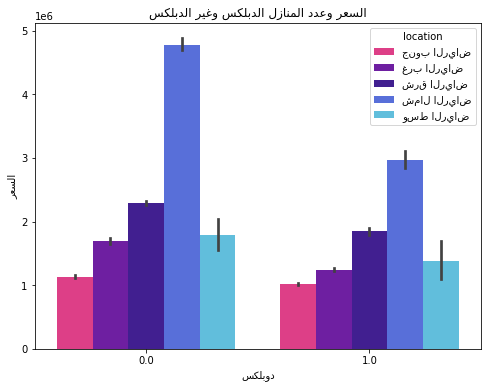

In [68]:
plt.figure(figsize=(8, 6))
sns.barplot(x='duplex', y='price', hue='location', data=Data, palette=["#F72585", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0"])

plt.title(get_display(arabic_reshaper.reshape('السعر وعدد المنازل الدبلكس وغير الدبلكس')))
plt.xlabel(get_display(arabic_reshaper.reshape('دوبلكس')))
plt.ylabel(get_display(arabic_reshaper.reshape('السعر')))

plt.show()

In [104]:
Colors = ["#F72585", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0"]
data1 = Data[Data['propertyAge'] < 10]

fig = px.pie(data1, values='propertyAge', names='location', title='نسبة العقارات أقل من 10 سنوات')
fig.update_traces(marker=dict(colors=Colors))
fig.update_layout(
    title = {'xanchor': 'center', 'x':0.5})
fig.update_traces(textposition='inside', textinfo='percent+label' ,marker=dict(colors=Colors))
fig.show()

In [40]:
plt.figure(figsize=(6,3))

count = Data.groupby('location')['price'].count()
df2 = count.reset_index()
fig = px.bar(df2,x='location',y='price',title="توزيع الفلل حسب الموقع",labels={'price':'عدد الفلل','location':'الموقع'})
fig.update_traces(marker=dict(color=Colors))
fig.update_layout(
    title = {'xanchor': 'center', 'x':0.5},
    xaxis_title='الموقع',
    yaxis_title="عدد الفلل "
)
fig.show()

<Figure size 432x216 with 0 Axes>

In [67]:
plt.figure(figsize=(6,3))
locationPool = Data.groupby(['location','pool']).mean('price').reset_index()
fig = px.bar(locationPool, x='location',y='price',color='pool',
            title="متوسط الاسعار على حسب المنطقة بوجود مسبح",barmode = 'group')

Colors = ["#F72585", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0", "#F8347B", "#7411B7", "#3B0DA2", "#4360EE" , "#4BC9F0" ]
fig.update_traces(marker=dict(color=Colors))

fig.update_layout(
    title = {'xanchor': 'center', 'x':0.5},
    xaxis_title='الموقع',
    yaxis_title="متوسط السعر ",
    legend_title="مسبح"
)
fig.show()

<Figure size 432x216 with 0 Axes>

In [111]:
grouped_data = Data.groupby('propertyAge')['price'].mean().reset_index()

fig = px.line(grouped_data, x='propertyAge', y='price', title='علاقة عمر الملكية مع متوسط السعر  ' , color_discrete_sequence = Colors)

fig.update_layout(
        title = {'xanchor': 'center', 'x':0.5},
        xaxis_title='عمر الملكية',
        yaxis_title='متوسط السعر '
)

fig.show()

In [43]:
neighbourhood_Top= Data['neighbourhood'].value_counts().nlargest(10)
neighbourhood_Top=pd.DataFrame({'Neighbourhood': neighbourhood_Top.index, 'Frequency': neighbourhood_Top.values})
neighbourhood_Top

Neighbourhood  Frequency
0         طويق        7774
1       الرمال        4141
2         عكاظ        3224
3       النرجس        3151
4          بدر        2718
5       العارض        2324
6     المونسية        1912
7       الملقا        1651
8      المهدية        1346
9        الحزم        1171

In [92]:
import plotly.graph_objects as go

Colors = ["#F72585", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0"]

fig = go.Figure(data=go.Pie(
    labels=neighbourhood_Top['Neighbourhood'].head(5),
    values=neighbourhood_Top['Frequency'].head(5),
    title='أفضل 5 أحياء',
    textposition='inside',
    textinfo='percent+label',
    marker=dict(colors=Colors)
))

fig.update_layout(
    title={'xanchor': 'center', 'x': 0.5},
)

fig.show()

In [94]:
import plotly.express as px
avg_price_space_by_location = Data.groupby('location').agg({'price': 'mean', 'space': 'mean'}).reset_index()

fig = px.bar(avg_price_space_by_location, x='location', y=['price', 'space'],
             title='متوسط الأسعار والمساحة حسب الموقع',
             labels={'location': 'الموقع', 'value': 'القيمة', 'variable': 'المتغير'},
             color_discrete_sequence=Colors)

fig.update_layout(barmode='group')
fig.update_traces(opacity=0.8)

fig.show()

In [46]:
mid= Data[Data['location']=='وسط الرياض']
mid= mid[mid['lounges']>=1]


mid2 = mid['neighbourhood'].value_counts().to_frame('lounges')
mid2['location'] = 'وسط الرياض'

mid3 = mid2.head(10)
mid3

lounges    location
 الربوة                63  وسط الرياض
 الفاروق               42  وسط الرياض
 اليمامة               17  وسط الرياض
 المنصورة              14  وسط الرياض
 الخالدية              13  وسط الرياض
 جرير                  13  وسط الرياض
 المربع                 9  وسط الرياض
 الضباط                 9  وسط الرياض
 عتيقة                  6  وسط الرياض
 منفوحة الجديدة         5  وسط الرياض

In [47]:
plt.figure(figsize=(6,3))

Colors = ["#F72585", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0" , "#F8347B", "#7411B7", "#3B0DA2", "#4360EE" , "#4BC9F0"]

Fig = px.sunburst(mid3, path=['location',mid3.index,'lounges'],values='lounges', template='ggplot2', height=800,
                 title='أعلى 10 أحياء في وسط الرياض من ناحية عدد الصالات',
                 labels={'lounges':'الصالات'} ,color_discrete_sequence = Colors)
Fig.show()

<Figure size 432x216 with 0 Axes>

In [110]:
Data.rename(columns={'rooms': 'الغرف', 'lounges':'الصالة', 'bathrooms':'دورة مياه',  'pool':'المسبح', 'patio':'فناء'}, inplace=True)

grouped_data = Data.groupby('location')[['الغرف', 'الصالة', 'دورة مياه','المسبح', 'فناء']].mean().reset_index()


melted_data = pd.melt(grouped_data, id_vars=['location'], 
                      value_vars=['الغرف', 'الصالة', 'دورة مياه','المسبح', 'فناء'] ,
                       var_name='المميزات', value_name='متوسط عدد المميزات' )

plt.figure(figsize=(6,3))

fig = px.bar(melted_data,x='المميزات', y='متوسط عدد المميزات', color='location', barmode='group' ,color_discrete_sequence = Colors,
            labels={'location':'الموقع'})

fig.update_layout(
    title_text='متوسط عدد المميزات حسب الموقع  ',
    title = {'xanchor': 'center', 'x':0.5},
    xaxis_title='المميزات',
    yaxis_title='متوسط عدد المميزات',
    )


# Show the chart
fig.show()

Data.rename(columns={'الغرف':'rooms', 'الصالة':'lounges', 'دورة مياه':'bathrooms', 'المسبح':'pool', 'فناء':'patio'}, inplace=True)

<Figure size 432x216 with 0 Axes>

In [114]:
import plotly.graph_objects as go

Colors = ["#F72585", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0"]

fig = go.Figure(data=go.Scatter3d(
    x=Data['space'],
    y=Data['price'],
    z=Data['rooms'],
    mode='markers',
    marker=dict(
        size=5,
        color=Data['price'],
        colorscale='Viridis',
        opacity=0.8,
        showscale=True
    ),
    
))

fig.update_layout(
    scene=dict(
        xaxis_title='حجم الملكية',
        yaxis_title='السعر',
        zaxis_title='عدد الغرف'
    ),
    title='حجم العقار مقابل السعر مقابل عدد الغرف',
    width=800,
    height=600,
    showlegend=True
)

fig.show()

In [113]:
from dash import Dash, html, dcc, Input, Output, dash_table, callback
from dash.exceptions import PreventUpdate
import dash_bootstrap_components as dbc
import collections
import pandas as pd
from jupyter_dash import JupyterDash


app = JupyterDash(__name__)

additional_options = html.Div([
    html.Br(),
    html.H5('السعر', style={"text-align": "right"}),
    dcc.RangeSlider(
        min=1080,
        max=100000000,
        step=10000000,
        id='price-slider',
        value=[10000000, 50000000],  # Default values
        marks={i: f'{i:,}' for i in range(10000000, 100000001, 10000000)},
        tooltip={'placement': 'top', 'always_visible': True}
    ), 
    html.Br(),
    html.H5('خيارات اضافية', style={"text-align": "left"}),
    dcc.Checklist(
        options=[
            {'label': 'مصعد', 'value': 'elevator'},
            {'label': 'مسبح', 'value': 'pool'},
            {'label': 'مفروشة', 'value': 'furnihsed'},
            {'label': 'موقف', 'value': 'garage'},
            {'label': 'غرفة الخادمة', 'value': 'maidRoom'},
            {'label': 'قبو', 'value': 'basement'},
            {'label': 'فناء', 'value': 'patio'},
            {'label': 'ملحق', 'value': 'outdoorRoom'}
        ], inline=True,
        id='additional-options',
        value=[]
    ),
    html.Br(),
    html.Div(id='dashboard-content'),
])

additional_options2 = html.Div([
    dcc.Dropdown(id='dropdown1', options=[{'label':i, 'value':i} for i in Data['location'].unique()], value='وسط الرياض')
])

card_graph1 = dbc.Card(
    dbc.CardBody([
        dcc.Graph(id='u1-graph')
    ])
)

card_graph2 = dbc.Card(
    dbc.CardBody([
        dcc.Graph(id='u2-graph')
    ])
)

app.layout = html.Div([
    dbc.Row([
        dbc.Row([
            html.H1('عقارات الرياض', style={'textAlign':"Center"}),
        ]),
        html.Br(),
        dbc.Col([additional_options]),
        html.Br(),
        dbc.Col([dbc.Row([card_graph1])]),
        html.Br(),
    ]),
    dbc.Row([
        html.Br(),
        dbc.Col([
            dcc.Dropdown(id='dropdown1', options=[{'label':i, 'value':i} for i in Data['location'].unique()], value='وسط الرياض')
        ]),
        html.Br(),
        dbc.Col([card_graph2])
    ])
])

@app.callback(Output('u1-graph', 'figure'),
              [Input('price-slider', 'value'),
               Input('additional-options', 'value')])
def update_dashboard(price_range, additional_options):
    filtered_data = Data[(Data['price'].between(price_range[0], price_range[1]))]
    for option in additional_options:
        filtered_data = filtered_data[filtered_data[option] == True]
    
    fig = px.scatter(filtered_data, x='price', y='space', color='neighbourhood',
                     size_max=60,
                     labels={'price':'السعر', 'space':'المساحة', 'neighbourhood':'الحي'})    
    return fig

@app.callback(Output('u2-graph', 'figure'),
              [Input('dropdown1', 'value')])
def update_dashboard2(location):
    filter_loc = Data[Data['location'] == location]
    fig = px.scatter(filter_loc, x='price', y='space',
                     color='neighbourhood', size='price',
                     log_x=False, size_max=60,
                     labels={'neighbourhood': "الحي",'price': "السعر", 'space': "المساحة"})
    return fig

app.run_server(port=5890)

Dash app running on http://127.0.0.1:5890/
